# Calculating tanimoto similarity coefficients between reference drugs and training set drugs

# Method #1

In [1]:
import pandas as pd

In [2]:
fp_ref = pd.read_csv('../../../data/molecular_fingerprints_ref.csv')
fp_ref = fp_ref.drop(columns=['Name'])
fp_ref

,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,FP10,...,GraphFP1015,GraphFP1016,GraphFP1017,GraphFP1018,GraphFP1019,GraphFP1020,GraphFP1021,GraphFP1022,GraphFP1023,GraphFP1024
0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
fp_gen_exp = pd.read_csv('../../../data/molecular_fingerprints_gen_exp.csv')
fp_gen_exp = fp_gen_exp.drop(columns=['Name'])
fp_gen_exp

,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,FP10,...,GraphFP1015,GraphFP1016,GraphFP1017,GraphFP1018,GraphFP1019,GraphFP1020,GraphFP1021,GraphFP1022,GraphFP1023,GraphFP1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
421,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [4]:
def tanimoto_similarity(vector_a, vector_b):
    # Check if the vectors have the same length
    if len(vector_a) != len(vector_b):
        raise ValueError("Vectors must have the same length")

    # Calculate the intersection and union of the sets
    intersection = sum(x and y for x, y in zip(vector_a, vector_b))
    union = sum(x or y for x, y in zip(vector_a, vector_b))

    # Calculate Tanimoto similarity
    similarity = intersection / union if union != 0 else 0.0

    return similarity

In [5]:
tanimoto_similarity(fp_ref.iloc[0].to_list(), fp_gen_exp.iloc[0].to_list())

0.32379248658318427

In [10]:
import numpy as np
ssp = np.zeros((len(fp_gen_exp), len(fp_ref)))

for i in range(len(fp_gen_exp)):
    for j in range(len(fp_ref)):
        ssp[i, j] = tanimoto_similarity(fp_gen_exp.iloc[i].to_list(), fp_ref.iloc[j].to_list())

In [11]:
ssp

array([[0.32379249, 0.30421687, 0.26749336, ..., 0.27253558, 0.50589391,
        0.28361858],
       [0.3060567 , 0.42082294, 0.29535036, ..., 0.40598291, 0.36752137,
        0.40872805],
       [0.35320417, 0.33591731, 0.25408091, ..., 0.3467189 , 0.390625  ,
        0.35108153],
       ...,
       [0.28058051, 0.35894125, 0.31295488, ..., 0.36818851, 0.35561878,
        0.35953821],
       [0.20754717, 0.2170088 , 0.21231044, ..., 0.21473029, 0.21851543,
        0.21875   ],
       [0.19095941, 0.19612403, 0.17280453, ..., 0.17352321, 0.20322292,
        0.16952264]])

In [12]:
# Convert the matrix to a 3D matrix of shape (len(fp_gen_exp), len(fp_ref), 1)
ssp = ssp.reshape(ssp.shape[0], ssp.shape[1], 1)
ssp.shape

(425, 18, 1)

In [13]:
# Split train, test

TEST_SIZE = 75
data_train = ssp[TEST_SIZE:]
data_test = ssp[:TEST_SIZE]

In [14]:
# Save dataset
import h5py

h5f = h5py.File('../../../data/similarity_coefficients_train.h5', 'w')
h5f.create_dataset('data', data=data_train)
h5f.close()

h5f = h5py.File('../../../data/similarity_coefficients_test.h5', 'w')
h5f.create_dataset('data', data=data_test)
h5f.close()

In [16]:
# Load datsets

h5f = h5py.File('../../../data/similarity_coefficients_train.h5', 'r')
data_train = h5f['data'][:]

h5f = h5py.File('../../../data/similarity_coefficients_test.h5', 'r')
data_test = h5f['data'][:]


print(data_train.shape)
print(data_test.shape)

(350, 18, 1)
(75, 18, 1)


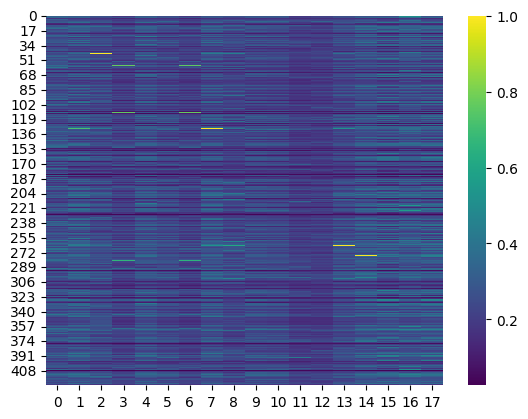

In [10]:
# Display the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(ssp, cmap='viridis')

plt.show()

In [12]:
# Show the tanimoto similarity between the reference drugs

ssp_ref = np.zeros((len(fp_ref), len(fp_ref)))

for i in range(len(fp_ref)):
    for j in range(len(fp_ref)):
        ssp_ref[i, j] = tanimoto_similarity(fp_ref.iloc[i].to_list(), fp_ref.iloc[j].to_list())

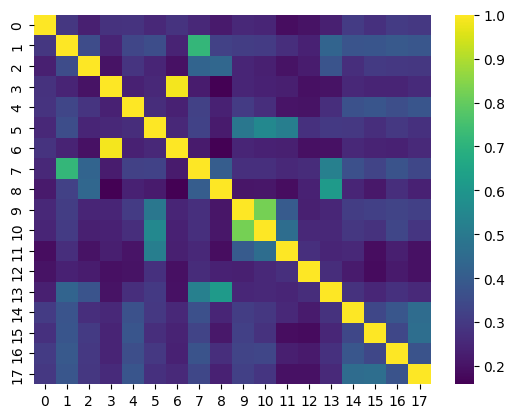

In [14]:
# Display the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(ssp_ref, cmap='viridis')

plt.show()

# Method #2

In [71]:
import pandas as pd

df_gen_exp = pd.read_csv('../../../data/gen_exp_drugs_st_SMILES.csv')
df_gen_exp.head()

,drug_name,standardized_SMILES
0,5-methoxytryptamine,COc1ccc2[nH]cc(CCN)c2c1
1,acalabrutinib,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...
2,acemetacin,COc1ccc2c(c1)c(CC(=O)OCC(=O)O)c(C)n2C(=O)c1ccc...
3,acipimox,Cc1cnc(C(=O)O)c[n+]1[O-]
4,adapalene,COc1ccc(-c2ccc3cc(C(=O)O)ccc3c2)cc1C12CC3CC(CC...


In [72]:
df_ref = pd.read_csv('prostate_cancer_drugs_fda_approved_25aug2023.csv')
df_ref.head()

,drug_name,canonical_SMILES
0,Abiraterone Acetate,CC(=O)OC1CCC2(C3CCC4(C(C3CC=C2C1)CC=C4C5=CN=CC...
1,Apalutamide,CNC(=O)C1=C(C=C(C=C1)N2C(=S)N(C(=O)C23CCC3)C4=...
2,Bicalutamide,CC(CS(=O)(=O)C1=CC=C(C=C1)F)(C(=O)NC2=CC(=C(C=...
3,Cabazitaxel,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...
4,Darolutamide,CC(CN1C=CC(=N1)C2=CC(=C(C=C2)C#N)Cl)NC(=O)C3=N...


In [75]:
from rdkit_transformation import standardize

standardized_SMILES = [standardize(smiles) for smiles in df_ref['canonical_SMILES']]
df_ref['standardized_SMILES'] = standardized_SMILES
df_ref.head()

,drug_name,canonical_SMILES,standardized_SMILES
0,Abiraterone Acetate,CC(=O)OC1CCC2(C3CCC4(C(C3CC=C2C1)CC=C4C5=CN=CC...,CC(=O)OC1CCC2(C)C(=CCC3C2CCC2(C)C(c4cccnc4)=CC...
1,Apalutamide,CNC(=O)C1=C(C=C(C=C1)N2C(=S)N(C(=O)C23CCC3)C4=...,CNC(=O)c1ccc(N2C(=S)N(c3cnc(C#N)c(C(F)(F)F)c3)...
2,Bicalutamide,CC(CS(=O)(=O)C1=CC=C(C=C1)F)(C(=O)NC2=CC(=C(C=...,CC(O)(CS(=O)(=O)c1ccc(F)cc1)C(=O)Nc1ccc(C#N)c(...
3,Cabazitaxel,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,COC1C(=O)C2(C)C(OC)CC3OCC3(OC(C)=O)C2C(OC(=O)c...
4,Darolutamide,CC(CN1C=CC(=N1)C2=CC(=C(C=C2)C#N)Cl)NC(=O)C3=N...,CC(Cn1ccc(-c2ccc(C#N)c(Cl)c2)n1)NC(=O)c1cc(C(C...


In [79]:
from rdkit import DataStructs, Chem
from rdkit.Chem import rdFingerprintGenerator

def tanimoto(s1, s2):
    ms = [Chem.MolFromSmiles(s1), Chem.MolFromSmiles(s2)]
    fpgen = rdFingerprintGenerator.GetRDKitFPGenerator()
    fps = [fpgen.GetFingerprint(x) for x in ms]
    return DataStructs.TanimotoSimilarity(fps[0],fps[1])

In [81]:
import numpy as np
ssp = np.zeros((len(df_gen_exp), len(df_ref)))

for i in range(len(df_gen_exp)):
    for j in range(len(df_ref)):
        ssp[i, j] = tanimoto(df_gen_exp['standardized_SMILES'][i], df_ref['standardized_SMILES'][j])

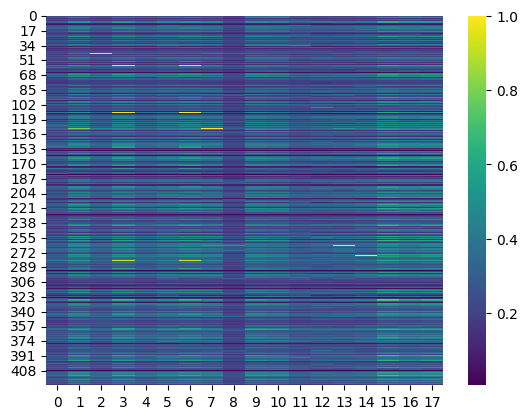

In [82]:
# Display the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(ssp, cmap='viridis')

plt.show()

# Method #3

In [76]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

def tanimoto(s1, s2):
    """Calculate the Tanimoto similarity of two SMILES strings."""
    try:
        mol1 = Chem.MolFromSmiles(s1)
        mol2 = Chem.MolFromSmiles(s2)
        fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=3072)
        fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=3072)
        return DataStructs.TanimotoSimilarity(fp1, fp2)
    except (TypeError, ValueError, AttributeError):
        return "Error: Not a valid SMILES string"

In [77]:
import numpy as np
ssp = np.zeros((len(df_gen_exp), len(df_ref)))

for i in range(len(df_gen_exp)):
    for j in range(len(df_ref)):
        ssp[i, j] = tanimoto(df_gen_exp['standardized_SMILES'][i], df_ref['standardized_SMILES'][j])

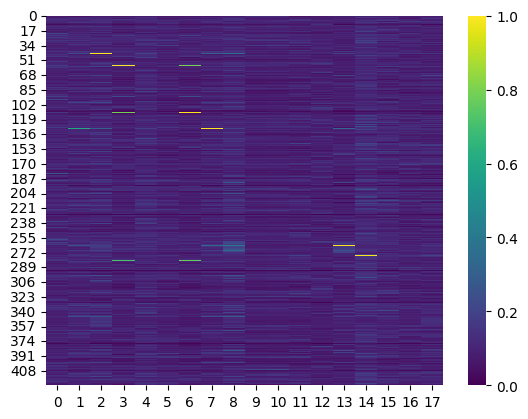

In [78]:
# Display the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(ssp, cmap='viridis')

plt.show()